## ***Libraries***

In [ ]:
#Import useful libraries--------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime as dt
import seaborn as sns
import pandas as pd
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from smtplib import SMTP
'''
1.filtrar datos basura= (na, trash_data)
2.agupar por dia, mes y año= (year, dayofmounth ,mounth)
3.calcular la tardanza  por envios= (Actual_Shipment_Time, Planned_Shipment_Time)
4.grafica de eficiencia de envios por mes= (2.(Actual_Shipment_Time, Planned_Shipment_Time))
5.grafica de eficiencia de envios por mes, nombre y numero de trasportista= (2.(4.(Carrier_Name, Carrier_Num)))
6.grafica de eficiencia de envios por mes, origen y destino= (2.(4.(origen, destino)))

7.grafica de eficiencia de entrega por mes, nombre y numero de trasportista
8.grafica de eficiencia de entrega por mes, origen y destino

   '''

'\n1.filtrar datos basura= (na, trash_data)\n2.agupar por dia, mes y año= (year, dayofmounth ,mounth)\n3.calcular la tardanza  por envios= (Actual_Shipment_Time, Planned_Shipment_Time)\n4.grafica de eficiencia de envios por mes= (2.(Actual_Shipment_Time, Planned_Shipment_Time))\n5.grafica de eficiencia de envios por mes, nombre y numero de trasportista= (2.(4.(Carrier_Name, Carrier_Num)))\n6.grafica de eficiencia de envios por mes, origen y destino= (2.(4.(origen, destino)))\n\n7.grafica de eficiencia de entrega por mes, nombre y numero de trasportista\n8.grafica de eficiencia de entrega por mes, origen y destino\n\n   '

## ***Data Extraction***

In [ ]:
#Data extraction----------------------------------------------------------------


from google.colab import drive
drive.mount('/content/drive')

deliv=pd.read_csv('/content/drive/MyDrive/delivery_dataset.csv',sep=';')
data=pd.DataFrame(deliv)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***PIE GRAPHS***

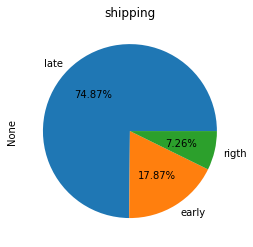

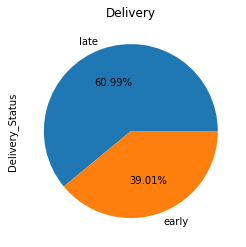

KeyError: ignored

In [ ]:

def data_NA_drop(data):
  data =data.dropna()
  data =data.reset_index(drop=True)
  return data

def trash_data(trash):
  global data
  data=data.drop([trash])

def Timedata_filter(timedata):
  timefilter =[]
  trash =0
  for i in timedata:
    i=str(int(i))
    if len(i)==3 or len(i)==4:
      timefilter.append(i)
      trash +=1
    else:
      trash_data(trash)
      trash +=1
  return timefilter

def time_separation(time_format):
  hours=[]
  minutes=[]
  for i in time_format:
    if len(i)==3 or len(i)==4:
      mi=i[:-2]
      ho=i[-2:]
      hours.append(int(ho))
      minutes.append(int(mi))
  return hours,minutes

def Shipping_expectation(ast,pst):
  time_sh={"S":[]}
  for x,y in zip(ast,pst): 
    if x==y:
      time_sh["S"].append("rigth")
    elif x<y:
      time_sh["S"].append("early")
    elif x>y:
      time_sh["S"].append("late")
  return time_sh

def Shipping_delay(ast,pst):
  time_de={"delay":[]}
  h1,m1=time_separation(ast)
  h2,m2=time_separation(pst)
  for x1,y1,x2,y2 in zip(h1,m1,h2,m2):
    h3=60*(x1-x2)
    time_de["delay"].append((h3+y1)-y2)
  return time_de
  
def Delivery_expectation(sdt):
  time_del={"D":[]}
  for x in sdt: 
    if x==0:
      time_del["D"].append("rigth")
    elif x<0:
      time_del["D"].append("early")
    elif x>0:
      time_del["D"].append("late")
  return time_del 

def Delivery_efficiency(data):
  data.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="Delivery",autopct='%1.2f%%')
  return plt.show()

def Shipment_efficiency(A_Stime,P_Stime):
  shipping_expec=Shipping_expectation(A_Stime,P_Stime)
  shipping_expec=pd.DataFrame(shipping_expec)
  shipping_expec.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="shipping",autopct='%1.2f%%')
  return plt.show()

def Delay_day(data):
  total_delay={}
  for i in data["DayofMonth"]:
    total_delay[i]=0
  inde=0
  coun=0
  for i in data["Shipment_Delay"]:
    coun =coun+i
    total_delay[data["DayofMonth"][inde]]=int(coun)
    inde +=1
  total_delay=pd.DataFrame([[Key,total_delay[Key]] for Key in total_delay.keys()],columns=["days","total_minutes_delay"])

  plt.bar(total_delay["days"],total_delay["total_minutes_delay"])
  plt.xlabel("Delay per mounth")
  return plt.show()


data=data_NA_drop(data)
A_Stime=Timedata_filter(data["Actual_Shipment_Time"])
P_Stime=Timedata_filter(data["Planned_Shipment_Time"])
P_Dtime=Timedata_filter(data["Planned_Delivery_Time"])
S_Dtime=data["Shipment_Delay"]
D_Status=data["Delivery_Status"]

Shipment_efficiency(A_Stime,P_Stime)
Delivery_efficiency(D_Status)
Delay_day(data)

with PdfPages('Performance graphs.pdf') as pdf:
    txt='Efficiency per month'
    firstpage=plt.figure(figsize=(8.50,8.00))
    firstpage.clf()
    firstpage.text(0.5,0.5,txt,transform=firstpage.transFigure,size=24,ha='center')
    pdf.savefig()
    plt.close()
    
    Shipment_efficiency(A_Stime,P_Stime)
    pdf.savefig()
    plt.close()

    Delivery_efficiency(D_Status)
    pdf.savefig()
    plt.close()

    Delay_day(data)
    pdf.savefig()
    plt.close()


#data



  

In [ ]:
with PdfPages('Performance graphs.pdf') as pdf:
    txt='Efficiency per month'
    firstpage=plt.figure(figsize=(8.50,8.00))
    firstpage.clf()
    firstpage.text(0.5,0.5,txt,transform=firstpage.transFigure,size=24,ha='center')
    pdf.savefig()
    plt.close()
    
    Shipment_efficiency(A_Stime,P_Stime)
    pdf.savefig()
    plt.close()

    Delivery_efficiency(D_Status)
    pdf.savefig()
    plt.close()

    Delay_day(data)
    pdf.savefig()
    plt.close()

In [ ]:
mensaje=MIMEMultipart("plain")
mensaje=["From"]="alvaro.arauz.23@gmail.com"
mensaje=["To"]="samuel"
mensaje=["Subject"]="graficas de rendimiento"
adjunto=MIMEBase("application","octect-stream")
adjunto.set_playload(open('Performance graphs.pdf',"rb").read())
mensaje.attach(adjunto)
smtp= SMTP("smtp.gmail.com")
smtp=starttls() 
smtp.login("")
smtp.sendmail("")
smtp.quit




## ***BAR GRAPH***

In [ ]:
#Datatable----------------------------------------------------------------------

bargraph_data = data.value_counts(['DayofMonth']).rename_axis('Month').reset_index(name='amount')
bargraph_data.sort_values(by='Month')

,Month,amount
2,3,2367
0,4,3438
1,5,2809
3,6,385


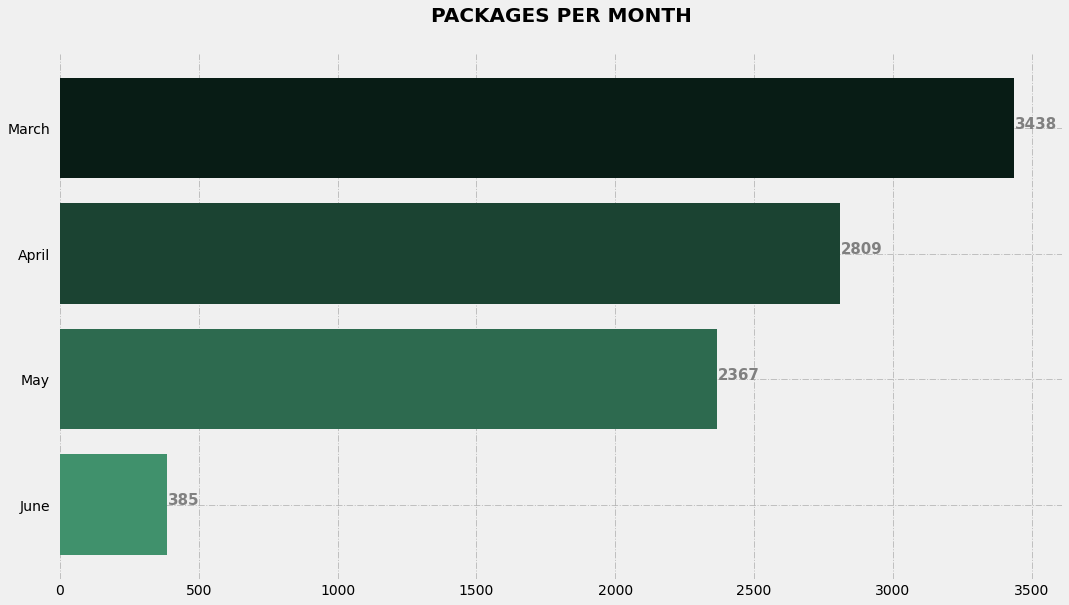

In [ ]:
#Set labels and values for the bar chart----------------------------------------

bargraph_labels = ['March','April','May','June']
bargraph_values = bargraph_data.amount

#Visualization of the bar graph-------------------------------------------------

#bar color

bargraph_colors = ['#081c15','#1b4332','#2d6a4f','#40916c','#52b788','#74c69d','#95d5b2','#b7e4c7']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(bargraph_labels, bargraph_values,color = bargraph_colors)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='black',
		linestyle ='-.', linewidth = 1,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+3, i.get_y()+0.4,
			str(round((i.get_width()), 3)),
			fontsize = 15, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('PACKAGES PER MONTH',loc ='center',fontdict={'fontsize':20,'fontweight':'bold'}, y=1.05  )



# Show Plot
plt.show()


## ***DELIVERED VS UNDELIVERED***

In [ ]:
#Dataframe----------------------------------------------------------------------

from os import name
piechart_data = data.value_counts(['Delivery_Status']).rename_axis('Status').reset_index(name='amount')
piechart_data

,Status,amount
0,0.0,5336
1,1.0,3389


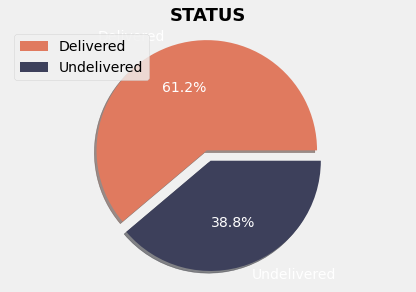

In [ ]:
#Set lables and values for piechart---------------------------------------------

piechart_labels = ['Delivered','Undelivered']
piechart_values = piechart_data.amount
exp = [0.1,0.0]
piechart_colors = ['#e07a5f','#3d405b']

#Visualization of the piechart--------------------------------------------------

plt.pie(piechart_values, labels = piechart_labels,explode= exp,shadow=True, autopct='%2.1f%%',textprops=dict(color="w",),colors=piechart_colors)
plt.style.use("fivethirtyeight")
plt.tight_layout()
plt.axis('equal')
plt.title('STATUS',fontdict={'fontsize':18,'fontweight':'bold'}) 
plt.legend(loc='upper left')



plt.show()

## ***DISTANCE VS DELIVERY***

In [ ]:
#Dataframe----------------------------------------------------------------------

dataframe_origin = data[['Source','Delivery_Status']]
dataframe_origin

for country in dataframe_origin['Source']:

    filter = pd.DataFrame(country)
    filter

,0
0,IAD
1,IND
2,ISP
3,JAN
4,JAX
...,...
59,ELP
60,FLL
61,GEG
62,HOU
